# Detecting Peaks in a Spectrum

In [1]:
import spectrumlib
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
filename = 'shear.png'
spectrum = spectrumlib.getSpectrum(filename)

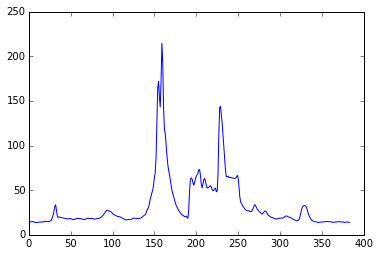

In [3]:
plt.plot(spectrum)

First, find the relative maxima of the spectrum.

In [4]:
from scipy.signal import argrelextrema
maxes = argrelextrema(spectrum, np.greater, order=2)

In [5]:
print maxes[0]

[  5  14  20  32  49  58  71  74  94 119 125 155 159 188 194 204 210 217
 223 229 238 249 263 270 282 308 329 358 370 380]


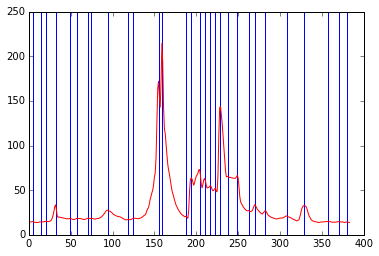

In [6]:
for x in maxes[0]:
    plt.axvline(x)
plt.plot(spectrum, color='r')

This clearly gives us way too many local maxima. 

So, next, we try the `find_peaks_cwt` function from `scipy.signal`, which uses wavelets.

In [7]:
from scipy.signal import find_peaks_cwt
cwt_peaks = find_peaks_cwt(spectrum, np.arange(10,15))

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2507: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


In [8]:
print cwt_peaks

[8, 33, 97, 159, 202, 233, 330, 374]


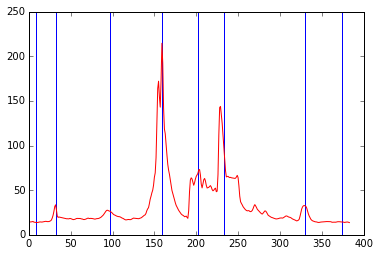

In [9]:
for x in cwt_peaks:
    plt.axvline(x)
plt.plot(spectrum, color='r')

This is better, in that we lost all the spurious values, but it doesn't match that well, and we don't get the
double-peak (near 150) anymore.

https://gist.github.com/endolith/250860 has a python translation of a matlab peak-detection script. Downloaded as `peakdetect.py`

In [10]:
import peakdetect
peaks, valleys = peakdetect.peakdet(spectrum, 3)

In [11]:
print peaks

[[  32.           33.5952381 ]
 [  94.           27.52380952]
 [ 155.          172.04761905]
 [ 159.          214.54761905]
 [ 194.           63.82142857]
 [ 204.           73.08333333]
 [ 210.           63.13095238]
 [ 229.          143.82142857]
 [ 249.           66.58333333]
 [ 270.           33.80952381]
 [ 282.           26.75      ]
 [ 308.           21.11904762]
 [ 329.           32.79761905]]


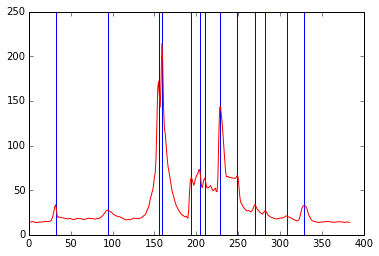

In [12]:
for index, val in peaks:
    plt.axvline(index)
plt.plot(spectrum, color='r')

This is a pretty decent result, which we should be able to use for matching with known spectra.

### Calibration

The sample spectrum above is for a fluorescent lamp. This is a known spectrum, that we can use for calibration. Here is a labelled plot of the spectrum: 

![Alt text](640px-Fluorescent_lighting_spectrum_peaks_labelled.gif)

"Fluorescent lighting spectrum peaks labelled". Licensed under CC BY-SA 3.0 via Wikimedia Commons - http://commons.wikimedia.org/wiki/File:Fluorescent_lighting_spectrum_peaks_labelled.gif#/media/File:Fluorescent_lighting_spectrum_peaks_labelled.gif

Visually, this appears to match pretty well with our spectrum. We calibrate the x-axis by matching two points with the known spectrum. Let's use the strongest two peaks: 5, at 546.5 nm (from Mercury) and 12, at 611.6 nm (from Europium). In our spectrum, peak 4 has a higher intensity than peak 12, but we'll use peak 12 anyway, because peaks 4 and 5 are too close together to get an accurate calibration.

In [13]:
intensities = sorted([intensity for index, intensity in peaks])
peak5 = [index for index, intensity in peaks if intensity == intensities[-1]][0]
peak12 = [index for index, intensity in peaks if intensity == intensities[-3]][0]
print peak5, peak12

159.0 229.0


Linear scale between index numbers and wavelengths:
<br>`wavelength = m*index + b`

In [14]:
peak5_wl = 546.5
peak12_wl = 611.6
m = (peak12_wl - peak5_wl)/(peak12 - peak5)
b = peak5_wl - m*peak5
print m, b

0.93 398.63


In [15]:
wavelengths = [m*index + b for index in range(len(spectrum))]

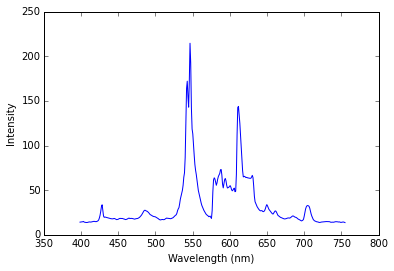

In [16]:
plt.plot(wavelengths, spectrum)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')